# Pymaceuticals Inc.
---

### Analysis


 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

m_data = merged_df.drop_duplicates(subset='Mouse ID')
# Display the data table for preview
m_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [179]:
merged_df['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [67]:
# Checking the number of mice.
len(m_data)

249

In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = m_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data)

249

## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume ='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
)

stats_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

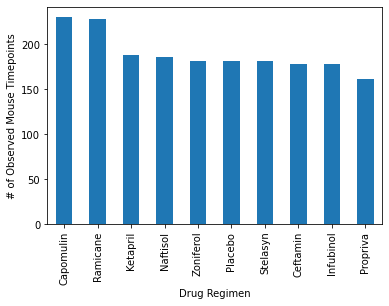

In [125]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar = merged_df.groupby('Drug Regimen')['Timepoint'].count()
drug_bar = regimen_timepoints.sort_values(ascending=False)
drug_bar.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')

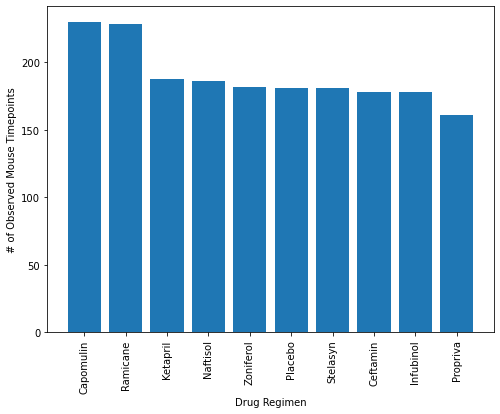

In [123]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.bar(drug_bar.index, drug_bar)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


<AxesSubplot:ylabel='Sex'>

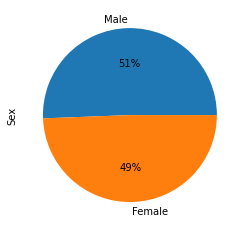

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = merged_df['Sex'].value_counts()

# Create a pie plot
gender_pie.plot(kind='pie', autopct='%1.0f%%')

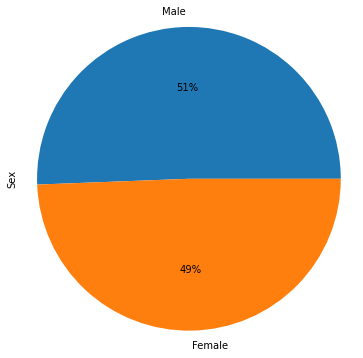

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))

plt.pie(gender_pie, labels=gender_pie.index,autopct='%1.0f%%')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint

filtered_drug = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(filtered_drug, last_timepoint, on=['Mouse ID','Timepoint'], how='inner')
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [157]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


tumor_volume_data = []

#Calculate IQR and find potential outliers
for treatment in treatments:
    # Get the tumor volume data for the current treatment
    current_treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate the IQR
    quartiles = current_treatment_data.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = current_treatment_data[(current_treatment_data < lower_bound) | (current_treatment_data > upper_bound)]
    
    # Add the results to the list
    tumor_volume_data.append((treatment, potential_outliers))

# Display the results
for treatment, outliers in tumor_volume_data:
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


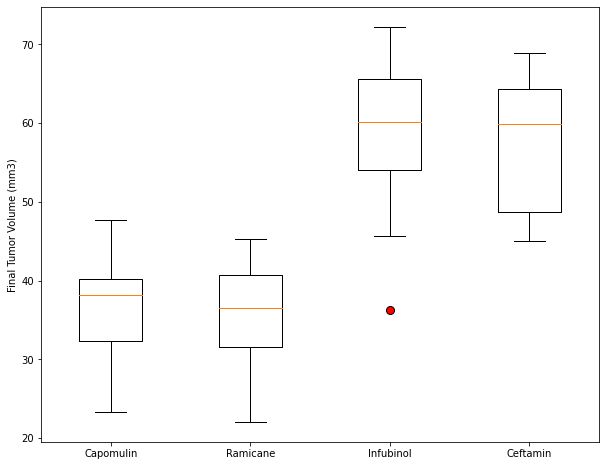

In [170]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store data for each treatment
tumor_volume_data_2 = []

# Loop through the treatments and collect tumor volume data
for treatment in treatments:
    current_treatment_data_2 = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data_2.append(current_treatment_data_2)



plt.figure(figsize=(10, 8))  
plt.boxplot(tumor_volume_data_2, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))
plt.ylabel('Final Tumor Volume (mm3)')

# Show the box plot
plt.show()


## Line and Scatter Plots

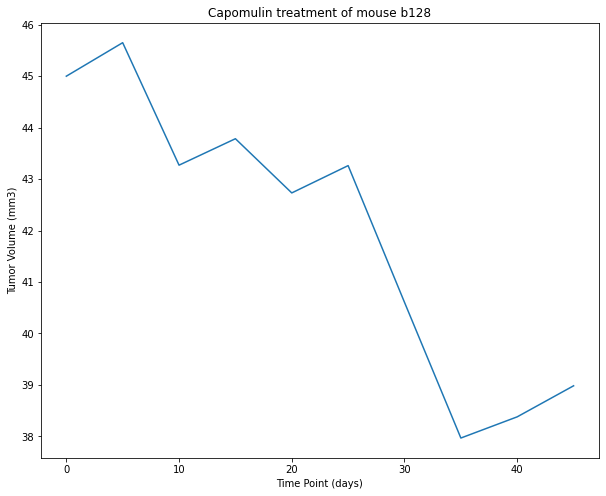

In [182]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_b128 = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == 'b128')]

plt.figure(figsize=(10, 8)) 
plt.plot(mouse_b128['Timepoint'], mouse_b128['Tumor Volume (mm3)'], linestyle='-')
plt.title(f'Capomulin treatment of mouse b128')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

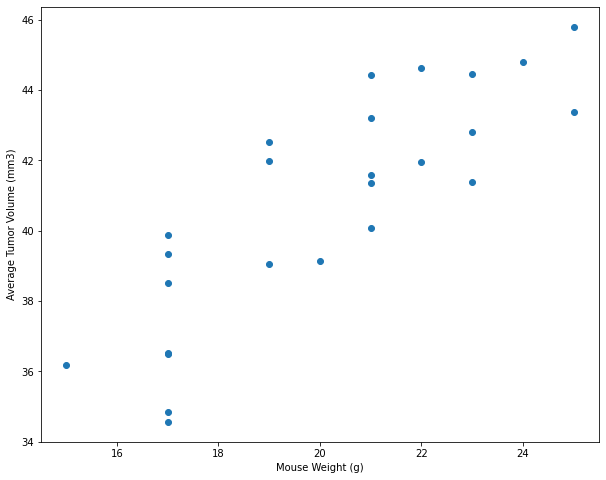

In [184]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'first', 'Tumor Volume (mm3)': 'mean'}).reset_index()


plt.figure(figsize=(10, 8)) 
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


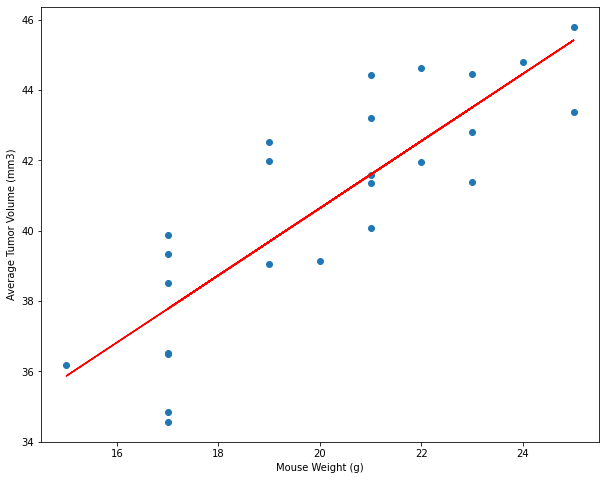

In [188]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = avg_data['Weight (g)'].corr(avg_data['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation,2)}')

plt.figure(figsize=(10, 8)) 
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

plt.plot(avg_data['Weight (g)'], slope * avg_data['Weight (g)'] + intercept, color='red')

plt.show()